# NLP FINAL Project

### Importing Packages

In [25]:
import numpy as np 
import pandas as pd
import string 
import nltk
import re
from bs4 import BeautifulSoup
import requests
from string import punctuation
stopword = nltk.corpus.stopwords.words('english')


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


from matplotlib.pyplot import subplot
from matplotlib import pyplot as plt
from matplotlib.pyplot import bar
import itertools

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support



wn = nltk.WordNetLemmatizer()
le = preprocessing.LabelEncoder()

import wnaffect
import emotion
from emotion import Emotion 
from wnaffect import WNAffect

wna = WNAffect('wordnet-1.6/', 'wn-domains-3.2/')

### Extracting Lyrics from Data

In [ ]:
url = data.iloc[:,2]
lyric_list = []
for URL in url:
    page = requests.get(URL)
    html = BeautifulSoup(page.text, "html.parser") # Extract the page's HTML as a string

    # Scrape the song lyrics from the HTML
    lyrics = html.find("div", class_="lyrics").get_text()
    lyric_list.append(lyrics)

In [4]:
%store -r lyric_list
# print(len(lyric_list))

2022


# PROJECT CODE

### Importing File

In [3]:
data = pd.read_csv('songs_trial_data_2000.csv',delimiter=',',header =None)

### Pre-Processing Function for Train and Test

In [5]:
def process_features(lyric_list):
    lyric_list_new = []
    
    for s in lyric_list:
        lyric_list_new.append(s)
        
    for element in range(1,len(lyric_list_new)):
        lyric_list_new[element] =lyric_list_new[element].replace("'"," ")
        lyric_list_new[element] = re.sub(r'[^\w\s]','',lyric_list_new[element])
        emo_list = []
        token = nltk.word_tokenize(lyric_list_new[element])
        tagged = nltk.pos_tag(token)
        tags = [x[1] for x in tagged]
        for i in range(0,len(token)):
            emo = wna.get_emotion(token[i], tags[i])
            if emo is not None:
                emo_list.append(str(emo))
        t = " ".join([word for word in emo_list]) 
        lyric_list_new[element]=t    
    return lyric_list_new

### Train-Test split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_moods = [word.title() for word in data.iloc[:,3]]
labels = le.fit_transform(data.iloc[:,3])
x_train, x_test, y_train, y_test = train_test_split(lyric_list,labels, train_size=0.8,test_size = 0.2)


In [18]:
#Training Set 
lyric_train_sub = process_features(x_train)
lyric_train_label = y_train

#Test set 
lyric_test_sub = process_features(x_test)
lyric_test_label = y_test


### Feature Extraction
##### Bag Of Words Approach

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = CountVectorizer()
trainX = matrix.fit_transform(lyric_train_sub).toarray()
lyric_train = trainX
# print(np.shape(lyric_train))

testX = matrix.transform(lyric_test_sub).toarray()
lyric_test = testX
# print(np.shape(lyric_test))

(1617, 342)
(405, 342)


# CLASSIFIER

### Logistical Regression

In [27]:
## LOGISTICAL REGRESSION

#Cross Validation for LogisticRegression

parameter_lr = {'C': [0.001,0.01,1,100,1000],'penalty':('l1','l2')}
lr = LogisticRegression(multi_class = 'ovr')
clf = GridSearchCV(lr,parameter_lr,cv=5)
clf.fit(lyric_train,lyric_train_label)
lyric_train_label_predict = clf.predict(lyric_train)
lyric_test_label_predict = clf.predict(lyric_test)


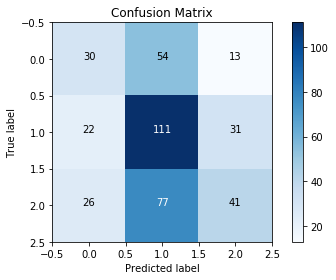

             precision    recall  f1-score   support

    class 0       0.38      0.31      0.34        97
    class 1       0.46      0.68      0.55       164
    class 2       0.48      0.28      0.36       144

avg / total       0.45      0.45      0.43       405

Train Accuracy:  0.551638837353123 	 Test Accuracy:  0.44938271604938274
Train Precision:  0.5840152335659395 	 Test Precision:  0.44188200391408955
Train Recall:  0.5221230113895183 	 Test Recall:  0.42360994701012306
Train F1 Score:  0.5252007126649 	 Test F1 Score:  0.4159112583446269


In [28]:
plt.figure
#Compute Confusion Matrix
cnf_matrix = confusion_matrix(lyric_test_label, lyric_test_label_predict)
plt.imshow(cnf_matrix, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
thresh = cnf_matrix.max() / 2.
plt.colorbar()
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),horizontalalignment="center",color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

#Classification Report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(lyric_test_label, lyric_test_label_predict, target_names=target_names))

#Accuracy, Precision, Recall, F1score
accuracy_train = accuracy_score(lyric_train_label,lyric_train_label_predict)
accuracy_test = accuracy_score(lyric_test_label,lyric_test_label_predict)
print("Train Accuracy: ",accuracy_train,'\t',"Test Accuracy: ",accuracy_test)

precision_train= precision_score(lyric_train_label,lyric_train_label_predict,average = 'macro')
precision_test =  precision_score(lyric_test_label,lyric_test_label_predict,average = 'macro')
print("Train Precision: ",precision_train,'\t',"Test Precision: ",precision_test)

recall_train= recall_score(lyric_train_label,lyric_train_label_predict,average = 'macro')
recall_test =  recall_score(lyric_test_label,lyric_test_label_predict,average = 'macro')    
print("Train Recall: ",recall_train,'\t',"Test Recall: ",recall_test) 

f1_train = f1_score(lyric_train_label,lyric_train_label_predict,average = 'macro')
f1_test = f1_score(lyric_test_label,lyric_test_label_predict,average = 'macro')
print("Train F1 Score: ",f1_train,'\t',"Test F1 Score: ",f1_test)

